# Exercise 2-4, Page 25, ThinkStats

DSC530
Astrid Fuentes
12/20/2020

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [13]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [7]:
# Load the nsfg female pregnancy file as preg
preg = nsfg.ReadFemPreg()

# Load the pregnancy outcome =1 from preg as live
live = preg[preg.outcome == 1]

In [8]:
# Define firsts as the first babies where birthord =1 and all the other pregnancies as others.
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [6]:
# Calculate the mean total weight in points for the two groups: "firsts" and "others"

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [27]:
diff = others.totalwgt_lb.mean()-firsts.totalwgt_lb.mean()
diff

0.12476118453549034

Based on the two means bove, we can see that the mean first babies total weight is sligtly smaller that the mean other babies total weight. The difference in means is 0.125 pounds.

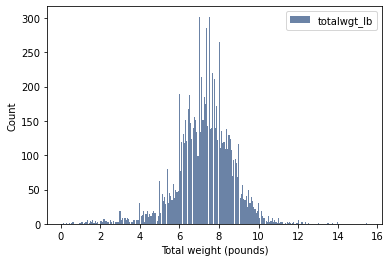

In [14]:
# Histogram of the totalwgt in pounds
hist = thinkstats2.Hist(live.totalwgt_lb, label='totalwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Total weight (pounds)', ylabel='Count')

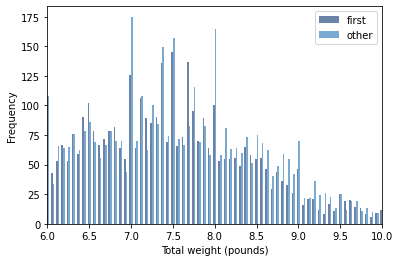

In [22]:
# Histogram of the totalwgt in poungs for the different groups
first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')
thinkplot.Hist(first_hist, align='right', width=0.02)
thinkplot.Hist(other_hist, align='left', width=0.02)
thinkplot.Config(xlabel='Total weight (pounds)', ylabel='Frequency', xlim=[6, 10])

In [23]:
# This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [24]:
#Calculate the Cohen's d

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

The Cohen's d = -.088 as calculated above can be interpreted as the difference in means between first babies total weight in ponds and other babies is 0.088 standard deviations, since it is less than 0.2 it is considered small hence the difference is trivial. even if it is statistically significant.
Compared to the difference in pregnancy length which had a Cohen's d of 0.029. We can see that the latter is smaller but still considered small and trivial. Another difference is that the Cohen's d for total weight is negative which indicates that our first group (firsts) has a smaller mean that the "others" group. For pregnancy length, the Cohen's d was calculated as CohenEffectSize(firsts.prglngth, others.prglngth), since the result is positve, the sign indicates that the "firsts" babies mean pregnancy length is slightly higher than the "others" group.